# Overview

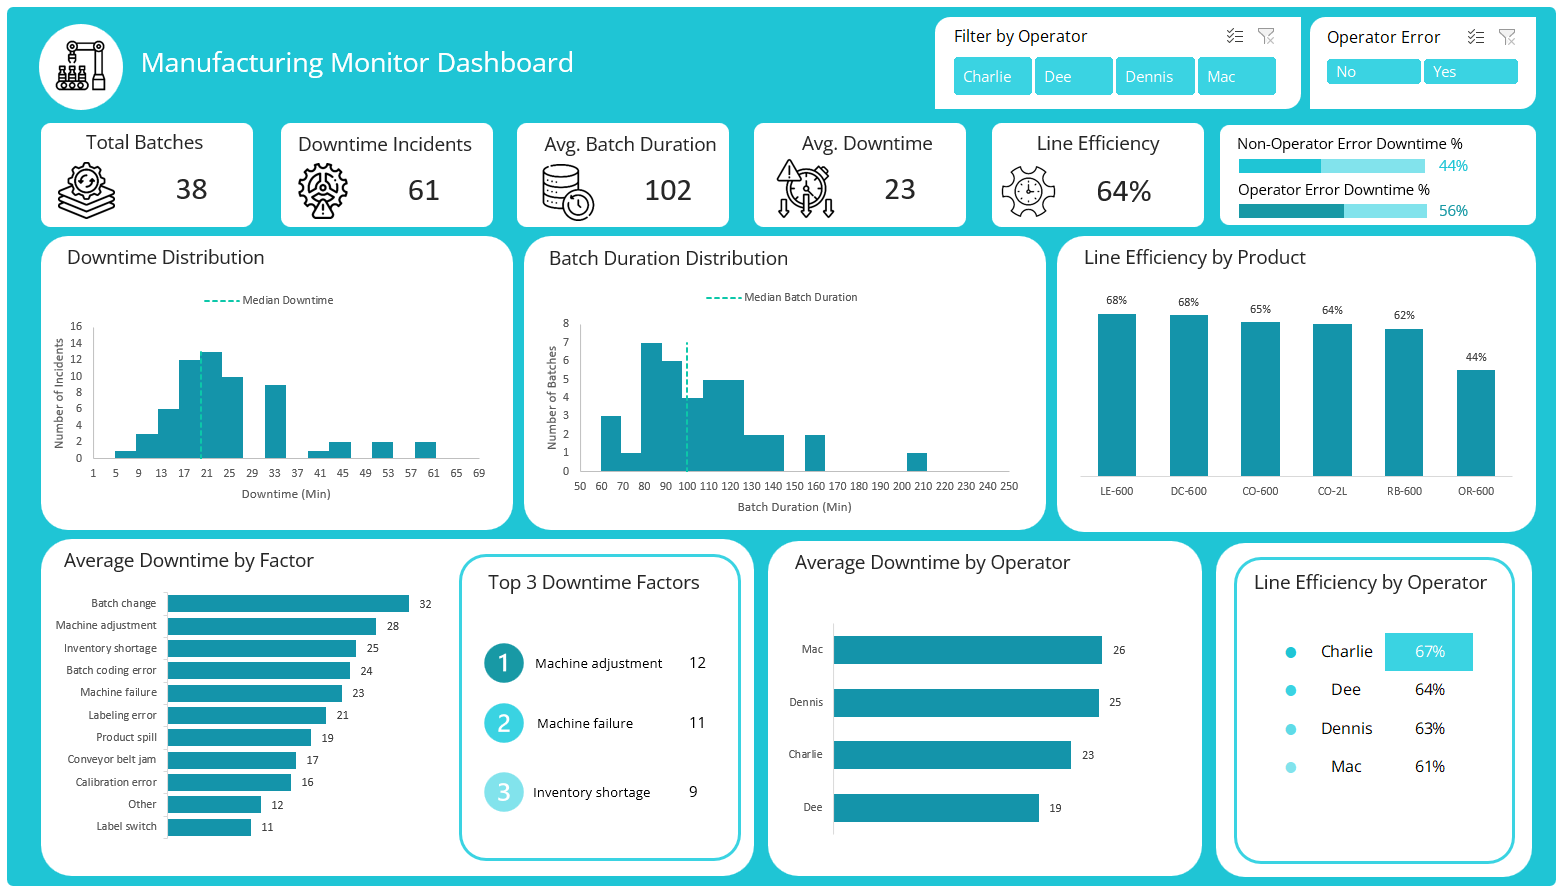

In this project, we analyzed productivity and downtime data for a soda bottling production line, which includes information on the operator, product, start and end times, and the factors contributing to downtime for each batch.

We will assist them in answering questions such as:
- What is the current line efficiency? (Min Time / Actual Time) * 100
- Are any operators underperforming?
- What are the main factors causing downtime?
- Do any operators face challenges with specific types of operator error?

# Data Gathering

We downloaded the dataset from [Maven Analytics](https://mavenanalytics.io/data-playground?dataStructure=Multiple%20tables&order=date_added%2Cdesc&tags=Business&tags=Environment&tags=Finance&tags=Food%20%26%20Beverage&tags=Government&tags=Healthcare&tags=Human%20Resources&tags=Retail&tags=Survey&tags=Time%20Series&tags=Transportation), titled `Manufacturing Downtime`. It contains four tables.

Here is a description for each column:


| Table             | Field             | Description                                                             |
|------------------|-------------------|-------------------------------------------------------------------------|
| Line productivity | Date              | Date the batch was produced                                             |
| Line productivity | Product           | ID for the product produced in the batch                                |
| Line productivity | Batch             | Unique ID for the batch produced                                        |
| Line productivity | Operator          | Production line operator in charge of the batch                         |
| Line productivity | Start Time        | Time the batch production started                                       |
| Line productivity | End Time          | Time the batch production ended                                         |
| Products          | Flavor            | Soda flavor for the product                                             |
| Products          | Size              | Product size (volume)                                                   |
| Products          | Min batch time    | Minimum time required to produce a batch (with no downtime)            |
| Line downtime     | Downtime factor | Downtime minutes for each factor ID (each factor is a column)          |
| Downtime factors  | Factor            | Unique ID for each downtime factor                                      |
| Downtime factors  | Description       | Downtime factor description                                             |
| Downtime factors  | Operator Error    | Indicates if the downtime was due to operator error (Yes/No)           |


# Exploratory Data Analysis

### Data Assessment and Cleaning
- There are no missing values.
- There are no duplicate rows.
- Downtime factors table
    - Twelve factors may lead to downtime. Half of them are due to operator errors.
- Line downtime table
    - This table is untidy. Each column does not represent a variable. It is pivoted. We need to unpivot it.
    - Use the first row as headers. Then select the `Batch` column and choose **Unpivot Other Columns** from the **Transform** menu.
    - You will get 3 columns:
        - `Batch`: Unique ID for the batch produced
        - `Factor`: Unique ID for each downtime factor
        - `Downtime`:  Downtime minutes for each factor ID
- Line productivity table
    -  Modify the data types of the `Start Time` and `End Time` columns to the **Time** data type.
    -  Create a new column to represent the batch's actual time in minutes by subtracting the start time from the end time.
    -  Use this formula to handle periods that cross midnight:
      
```
      Number.Round((if([Start Time] > [End Time]) then [End Time] - [Start Time] + 1 else [End Time] - [Start Time]) * 1440, 0)
```

#### Data Model
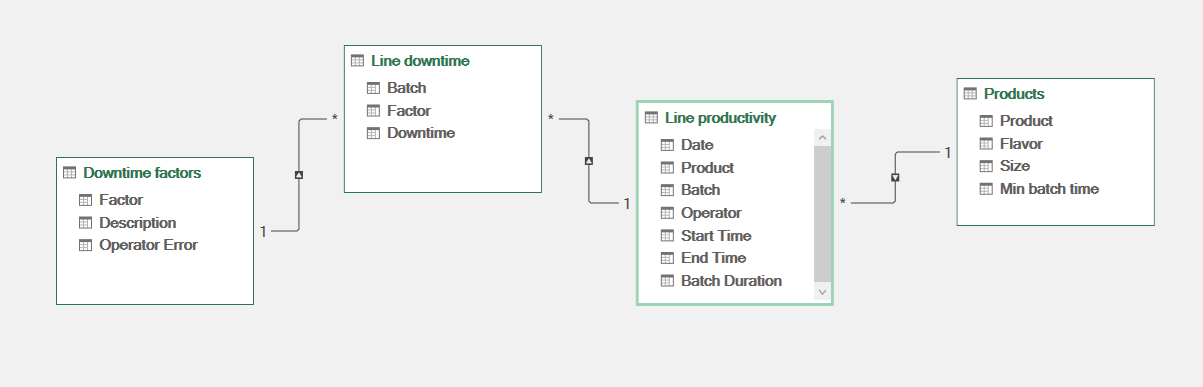

#### Measures
- Calculated the line efficiency:
$ \text{Line Efficiency} = (\text{Min Time} / \text{Total Batch Duration}) * 100 $
```
Total Min Time (min):=SUMX('Line productivity', RELATED(Products[Min batch time]))
Total Acutal Time (min):=SUM([Batch Duration])
Line Efficiency (%):=DIVIDE([Total Min Time (min)], [Total Acutal Time (min)], 0)
```

- Calculated Operator Error Downtime % and Non-operator Error Downtime %:
```
Total Downtime:=SUM('Line downtime'[Downtime])
Operator Error Downtime %:=CALCULATE([Total Downtime], 'Downtime factors'[Operator Error] = "Yes") / [Total Downtime]
Non-Operator Error Downtime %:=CALCULATE([Total Downtime], 'Downtime factors'[Operator Error]="No") / [Total Downtime]
```

# Communicating Results

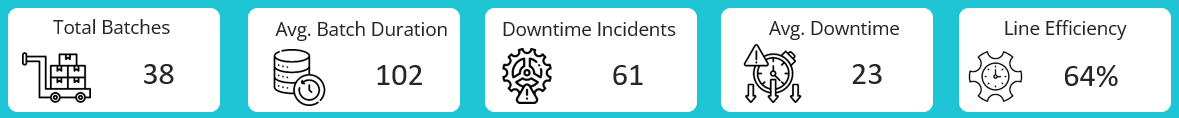
- A total of 38 batches were produced, with an average batch duration of 102 minutes.

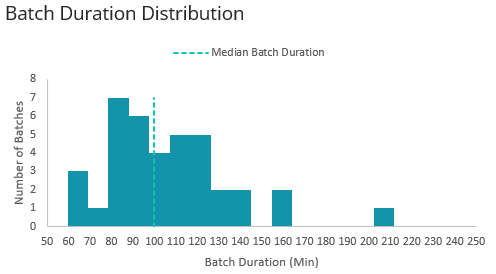
- If we look at the distribution of actual time for batches, we find that 50% of the batches took less than 100 minutes to complete, while the other 50% took more than 100 minutes. Also, there are some outliers in the data—some batches took 160 and even 210 minutes to complete.

- There were 61 downtime incidents, with an average duration of 23 minutes, meaning it took 23 minutes on average to resolve each downtime error.

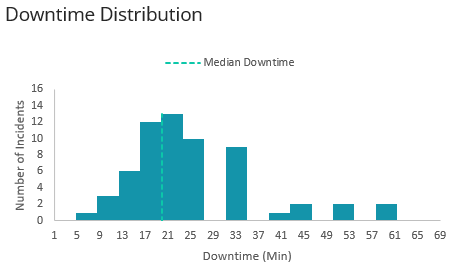
- Looking at the downtime distribution, we find that 50% of the incidents were resolved in under 20 minutes, while the remaining 50% took longer than 20 minutes. Additionally, some incidents took over 40 minutes to resolve, which may be considered outliers.

- The overall line efficiency is 64%, meaning that only 64% of the total manufacturing time was used productively. The remaining 36% was lost due to inefficiencies such as downtime, delays, or other non-productive activities.

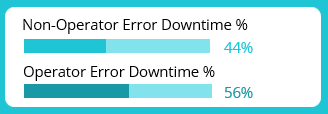
- Further investigation revealed that 56% of the downtime resulted from operator errors, while 44% was attributed to other issues.


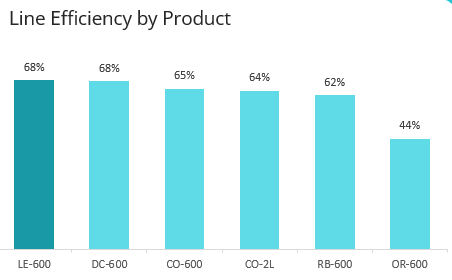
- The line efficiency is highest for the LE-600 and DC-600 products (68%), but it is much lower for the OR-600 (44%).

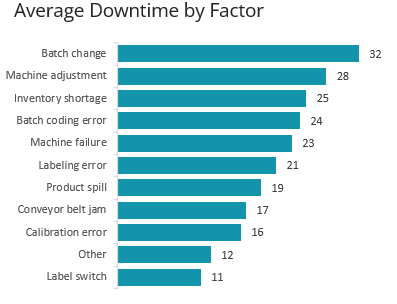
- Among all downtime factors, **Batch Change** takes 32 minutes to resolve, making it the longest, and it is also classified as an operator error.

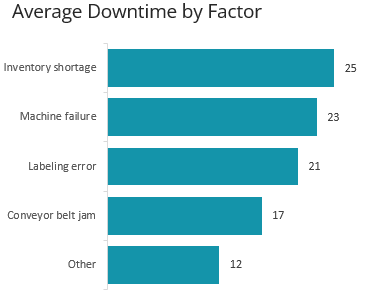
- If we filter out **Operator Error** to focus on non-operator factors, we find that **Inventory Shortage** is the most significant issue, taking approximately 25 minutes on average to resolve.

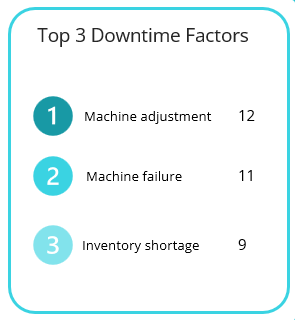

- Most of the downtime incidents occurred due to a **Machine Adjustment** error, which is classified as an operator error and takes an average of 28 minutes to be resolved.  
- The second and third most common factors are **Machine Failure** and **Inventory Shortage**, which are non-operator errors and take an average of 25 and 23 minutes, respectively, to be resolved.

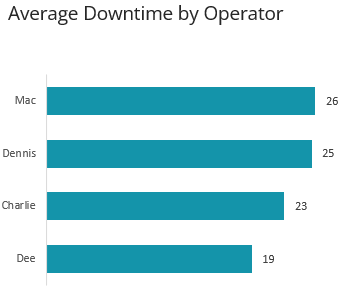
- Looking at the performance of the operators, we find that downtime incidents occurring when **Mac** is in charge of the batch take an average of 26 minutes to resolve, which is the longest duration. In contrast, **Dee** resolves errors in the shortest time, averaging 19 minutes.

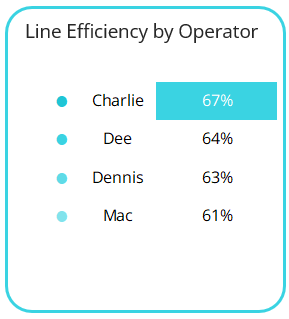
- When analyzing line efficiency by operator, we found that **Charlie** achieved the highest line efficiency at 67%, while **Mac** recorded the lowest efficiency at 61%.

#### Downtime Factors Analysis by Operator
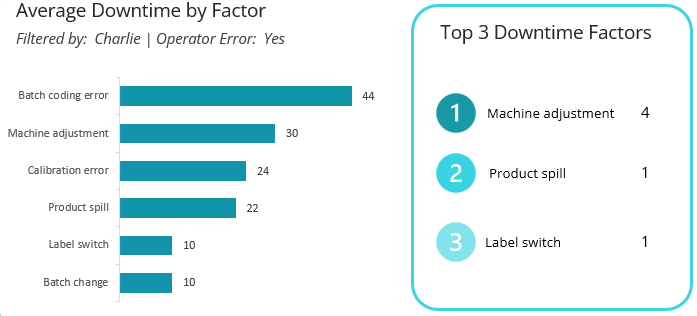

- If we look at operator downtime factors that occurred when **Charlie** was in charge, we find that the **Batch Coding Error** is the most time-consuming issue for **Charlie** to resolve. Additionally, the **Machine Adjustment** error occurred four times.


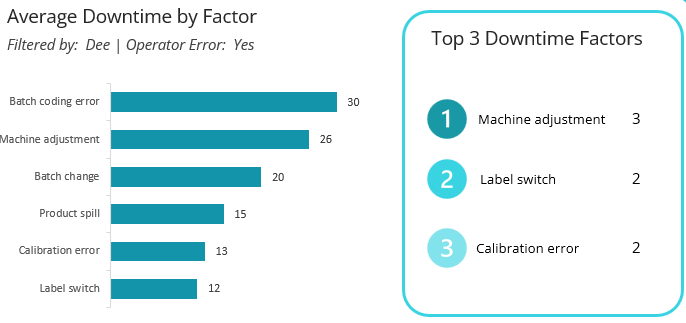
- In addition to **Charlie**, the **Batch Coding Error** is also the most time-consuming issue for **Dee** to resolve, and the **Machine Adjustment** error occurred 3 times.

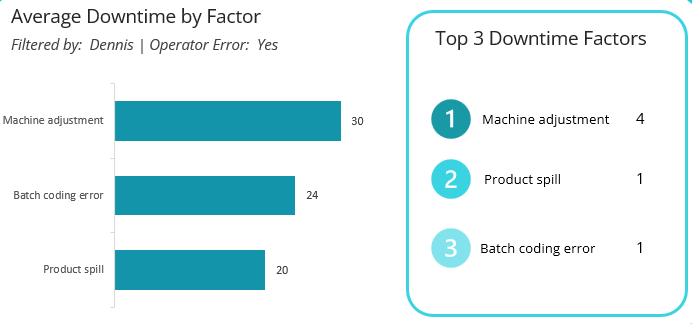
- The **Machine Adjustment** error is the most time-consuming issue for **Dennis**, occurring 4 times.
  
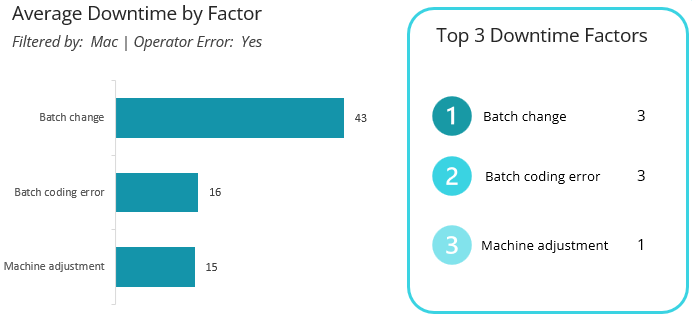
- The **Batch Change** error is the most time-consuming issue for **Mac**, occurring 3 times. The **Batch Coding Error** also occurred 3 times but took an average of 16 minutes to resolve.

# Conclusion and Recommendations